In [23]:
%pip install --quiet --upgrade jupysql ipywidgets ipympl duckdb duckdb-engine pandas matplotlib jupyterlab pyarrow numpy scipy

Note: you may need to restart the kernel to use updated packages.


In [24]:
import duckdb
import pandas as pd
import ipywidgets as widgets
from matplotlib import pyplot as plt, dates, ticker
import numpy as np
%load_ext sql
%matplotlib widget
conn = duckdb.connect()
%sql conn --alias duckdb
pd.options.mode.copy_on_write = True

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [25]:
%config SqlMagic.autopandas = True
#%config SqlMagic.displaycon = False

In [26]:
%%sql
INSTALL sqlite;
LOAD sqlite;

Running query in 'duckdb'

,Success


In [27]:
%%sql
ATTACH '396310.db' AS expdb (TYPE SQLITE) ;
USE expdb.main;

Running query in 'duckdb'

,Success


In [28]:
# set some matplotlib defaults
from matplotlib.dates import DateFormatter, MinuteLocator, SecondLocator, MicrosecondLocator
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('pdf', 'svg')
plt.rcParams['svg.fonttype'] = 'none'
# Set the global locator and formatter
plt.rcParams['date.autoformatter.microsecond'] = '%S.%f'  # Set the global format for microsecond level
plt.rcParams['date.autoformatter.second'] = '%H:%M:%S'  # Set the global format for second level
plt.rcParams['date.autoformatter.minute'] = '%H:%M'  # Set the global format for minute level
plt.rcParams['date.autoformatter.hour'] = '%Y-%m-%d %H:%M'  # Set the global format for hour level
plt.rcParams['date.autoformatter.day'] = '%Y-%m-%d %H:%M'  # Set the global format for day level
plt.rcParams['date.autoformatter.month'] = '%Y-%m-%d %H:%M'  # Set the global format for month level
plt.rcParams['date.autoformatter.year'] = '%Y-%m-%d %H:%M'  # Set the global format for year level


In [29]:
%sql SHOW;

Running query in 'duckdb'

,database,schema,name,column_names,column_types,temporary
0,expdb,main,Join_Message,"[join_message_id, app_received_at]","[BIGINT, TIMESTAMP]",False
1,expdb,main,Message,"[message_id, related_node, network_received_at]","[BIGINT, VARCHAR, TIMESTAMP]",False
2,expdb,main,Node,"[node_deveui, node_appeui, node_appkey, board_...","[VARCHAR, VARCHAR, VARCHAR, VARCHAR, VARCHAR, ...",False
3,expdb,main,Power_Consumption,"[power_consumption_id, node_id, timestamp, cur...","[BIGINT, VARCHAR, TIMESTAMP, DOUBLE, DOUBLE, D...",False
4,expdb,main,Radio,"[radio_id, timestamp, node_id, channel, rssi]","[BIGINT, TIMESTAMP, VARCHAR, BIGINT, BIGINT]",False
5,expdb,main,Site,[name],[VARCHAR],False
6,expdb,main,Trace,"[trace_id, node_id, timestamp, message]","[BIGINT, VARCHAR, TIMESTAMP, VARCHAR]",False
7,expdb,main,Uplink_Message,"[uplink_message_id, through_gateway, gateway_r...","[BIGINT, VARCHAR, TIMESTAMP, TIMESTAMP, BIGINT...",False
8,expdb,main,sqlite_sequence,"[name, seq]","[BLOB, BLOB]",False


In [30]:
hej = %sql select message from expdb.Trace WHERE message LIKE 'TIMINGS>%'

Running query in 'duckdb'

In [31]:
hej["message"][0]

'TIMINGS> Loop: 0, Sync: 806 ms, Load: 21 ms, sensor init: 26 ms, env init: 0 ms, net init: 8428 ms, Collect: -1 ms, Exec: -1 ms, Send: 8071 ms, save config: 698 ms, Sleep: 6 s\n'

In [32]:
%sql nodes =<< select distinct * from expdb.Node

Running query in 'duckdb'

,node_deveui,node_appeui,node_appkey,board_id,radio_chipset,node_site,profile,riot_board,failed
0,70B3D57ED005EA60,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1,0
1,70B3D57ED005EA75,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1,0
2,70B3D57ED005EA66,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1,0
3,70B3D57ED005EA67,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1,0
4,70B3D57ED005EA74,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1,0
5,70B3D57ED005EA63,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1,0
6,70B3D57ED005EA68,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1,1
7,70B3D57ED005EA70,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1,0
8,70B3D57ED005EA72,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1,0
9,70B3D57ED005EA73,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1,1


In [33]:
%%sql
DESCRIBE expdb.Trace

Running query in 'duckdb'

,column_name,column_type,null,key,default,extra


In [34]:

timestamps= %sql select timestamp from expdb.Power_Consumption 
timestamps

Running query in 'duckdb'

,timestamp
0,2024-04-25 14:27:34.443500
1,2024-04-25 14:27:34.444629
2,2024-04-25 14:27:34.445758
3,2024-04-25 14:27:34.446887
4,2024-04-25 14:27:34.448016
...,...
20346675,2024-04-25 14:47:40.707043
20346676,2024-04-25 14:47:40.708172
20346677,2024-04-25 14:47:40.709270
20346678,2024-04-25 14:47:40.710369


In [35]:
%sql select node_id,count(*),min(timestamp),max(timestamp) from expdb.Power_Consumption group by node_id

Running query in 'duckdb'

,node_id,count_star(),"min(""timestamp"")","max(""timestamp"")"
0,70B3D57ED005EA75,1088307,2024-04-25 14:27:34.428463,2024-04-25 14:47:40.707655
1,70B3D57ED005EA61,1078255,2024-04-25 14:27:34.399710,2024-04-25 14:47:40.709202
2,70B3D57ED005EA66,1054464,2024-04-25 14:27:34.471219,2024-04-25 14:47:40.699574
3,70B3D57ED005EA77,1061390,2024-04-25 14:27:34.406233,2024-04-25 14:47:40.710385
4,70B3D57ED005EA59,1087095,2024-04-25 14:27:34.604924,2024-04-25 14:47:40.711498
5,70B3D57ED005EA72,1074162,2024-04-25 14:27:34.525819,2024-04-25 14:47:40.707946
6,70B3D57ED005EA60,1073634,2024-04-25 14:27:34.831520,2024-04-25 14:47:40.714792
7,70B3D57ED005EA71,1071744,2024-04-25 14:27:34.443500,2024-04-25 14:47:40.707831
8,70B3D57ED005EA67,1073484,2024-04-25 14:27:34.377619,2024-04-25 14:47:40.712194
9,70B3D57ED005EA73,1085749,2024-04-25 14:27:34.394886,2024-04-25 14:47:40.710603


In [36]:
deveui = "70B3D57ED005EA59"

power_consumption= %sql select timestamp,power,current,voltage,node_id from expdb.Power_Consumption
power_consumption = power_consumption.set_index("timestamp")
#plot power with timestamps as x axis. timestamps need to show milliseconds
groups = power_consumption.groupby("node_id")
groups.groups.keys()

Running query in 'duckdb'

dict_keys(['70B3D57ED005EA59', '70B3D57ED005EA60', '70B3D57ED005EA61', '70B3D57ED005EA62', '70B3D57ED005EA63', '70B3D57ED005EA65', '70B3D57ED005EA66', '70B3D57ED005EA67', '70B3D57ED005EA68', '70B3D57ED005EA69', '70B3D57ED005EA70', '70B3D57ED005EA71', '70B3D57ED005EA72', '70B3D57ED005EA73', '70B3D57ED005EA74', '70B3D57ED005EA75', '70B3D57ED005EA76', '70B3D57ED005EA77', '70B3D57ED005EA78'])

/home/flapkap/.local/lib/python3.10/site-packages/ipympl/backend_nbagg.py:336: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self.figure.savefig(buf, format='png', dpi='figure')


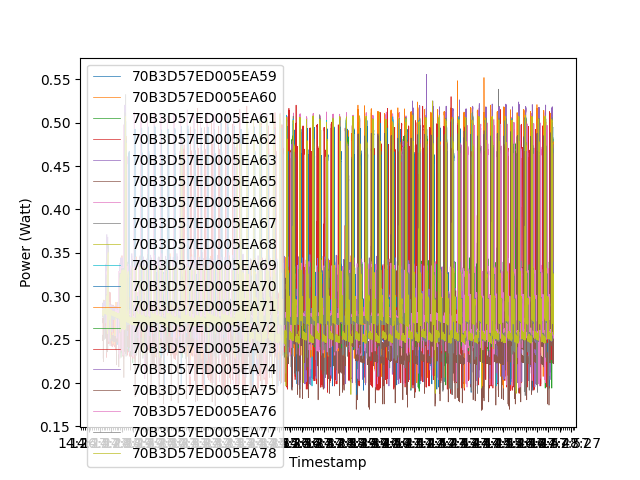

In [37]:
plt.figure()
for node_id, group in groups:
    plt.plot(group.index, group["power"], label=node_id, linewidth=0.5)

plt.xlabel("Timestamp")
plt.ylabel("Power (Watt)")
plt.gca().xaxis.set_major_locator(SecondLocator(interval=30))  # Set the major locator to display labels every 30 seconds
plt.gca().xaxis.set_minor_locator(SecondLocator(interval=5))  # Set the minor locator to display labels at millisecond level
plt.gca().xaxis.set_major_formatter(DateFormatter('%H:%M:%S')) 
#plt.gca().xaxis.set_minor_formatter(DateFormatter('%S.%f'))  
plt.legend()
plt.show()

In [38]:
groups["power"].get_group(deveui)

timestamp
2024-04-25 14:27:34.604924    0.283259
2024-04-25 14:27:34.606053    0.279596
2024-04-25 14:27:34.607152    0.283259
2024-04-25 14:27:34.608250    0.282648
2024-04-25 14:27:34.609379    0.282038
                                ...   
2024-04-25 14:47:40.707043    0.274712
2024-04-25 14:47:40.708172    0.274712
2024-04-25 14:47:40.709270    0.274712
2024-04-25 14:47:40.710369    0.275933
2024-04-25 14:47:40.711498    0.273491
Name: power, Length: 1087095, dtype: float64

## finding sync signals

In [39]:
BLINK_HIGH_MS = 200
BLINK_PRE_MS = 100
BLINK_POST_MS = 100

/home/flapkap/.local/lib/python3.10/site-packages/ipympl/backend_nbagg.py:336: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self.figure.savefig(buf, format='png', dpi='figure')


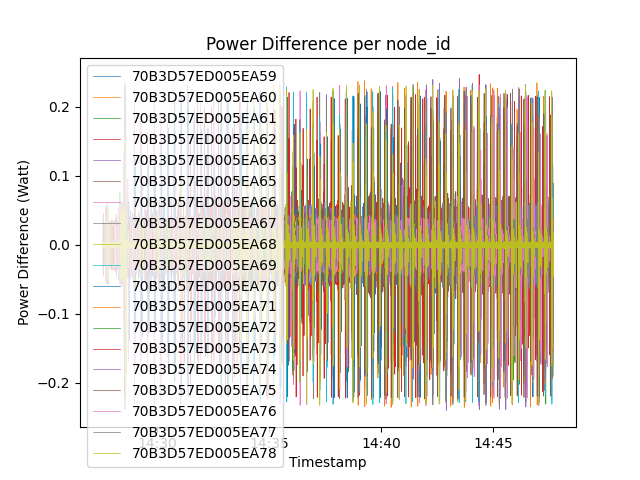

In [40]:
#diff of each group
power_consumption['power_diff'] = groups["power"].diff()

# single node
power_single = power_consumption[(power_consumption["node_id"] ==deveui)]
plt.figure()
for node_id, group in power_consumption.groupby("node_id"):
    plt.plot(group.index, group["power_diff"], label=node_id, linewidth=0.5)
plt.title("Power Difference per node_id")
plt.xlabel("Timestamp")
plt.ylabel("Power Difference (Watt)")
plt.legend()
plt.show()

In [41]:
rising_edge = power_consumption[power_consumption["power_diff"] > 0.1].copy()
rising_edge.loc[:,'direction'] = 'rising'
falling_edge = power_consumption[power_consumption["power_diff"] < -0.1].copy()
falling_edge.loc[:,'direction'] = 'falling'
edges = pd.concat([rising_edge, falling_edge], verify_integrity=True)
edges.sort_index(inplace=True)
edges.head()

,power,current,voltage,node_id,power_diff,direction
timestamp,,,,,,
2024-04-25 14:28:31.261095,0.391312,0.080631,4.85500,70B3D57ED005EA76,0.114158,rising
2024-04-25 14:28:31.262224,0.495092,0.102169,4.85125,70B3D57ED005EA76,0.103780,rising
2024-04-25 14:28:31.461420,0.374219,0.077041,4.85875,70B3D57ED005EA76,-0.115990,falling
2024-04-25 14:28:31.462549,0.272881,0.056090,4.85875,70B3D57ED005EA76,-0.101338,falling
2024-04-25 14:28:31.664033,0.407184,0.083952,4.85500,70B3D57ED005EA76,0.133693,rising


In [42]:
# populate edges with next direction and timestamps to later filter out edges that are too close to each other.
# need the index as dedicated column for this to be possible as a groupby transformation
edges['timestamp'] = edges.index.copy()
edges['next_direction'] = edges.groupby('node_id')['direction'].shift(-1)
edges['next_timestamp'] = edges.groupby('node_id')['timestamp'].shift(-1)
edges.head()

,power,current,voltage,node_id,power_diff,direction,timestamp,next_direction,next_timestamp
timestamp,,,,,,,,,
2024-04-25 14:28:31.261095,0.391312,0.080631,4.85500,70B3D57ED005EA76,0.114158,rising,2024-04-25 14:28:31.261095,rising,2024-04-25 14:28:31.262224
2024-04-25 14:28:31.262224,0.495092,0.102169,4.85125,70B3D57ED005EA76,0.103780,rising,2024-04-25 14:28:31.262224,falling,2024-04-25 14:28:31.461420
2024-04-25 14:28:31.461420,0.374219,0.077041,4.85875,70B3D57ED005EA76,-0.115990,falling,2024-04-25 14:28:31.461420,falling,2024-04-25 14:28:31.462549
2024-04-25 14:28:31.462549,0.272881,0.056090,4.85875,70B3D57ED005EA76,-0.101338,falling,2024-04-25 14:28:31.462549,rising,2024-04-25 14:28:31.664033
2024-04-25 14:28:31.664033,0.407184,0.083952,4.85500,70B3D57ED005EA76,0.133693,rising,2024-04-25 14:28:31.664033,falling,2024-04-25 14:28:31.864358


In [44]:
# now to filter out edges that are too close to each other or too far apart. We add 10% tolerance

# filter out edges that are too close to each other or too far apart. We add 10% tolerance
edges = edges[(edges['direction'] == "rising") & (edges['next_direction'] == "falling") & ((edges['next_timestamp'] - edges.index < pd.Timedelta(milliseconds=BLINK_HIGH_MS + (BLINK_HIGH_MS/10)))  & (edges['next_timestamp'] - edges.index > pd.Timedelta(milliseconds=BLINK_HIGH_MS - (BLINK_HIGH_MS/10))))]
edges.head()

,power,current,voltage,node_id,power_diff,direction,timestamp,next_direction,next_timestamp
timestamp,,,,,,,,,
2024-04-25 14:28:31.262224,0.495092,0.102169,4.85125,70B3D57ED005EA76,0.103780,rising,2024-04-25 14:28:31.262224,falling,2024-04-25 14:28:31.461420
2024-04-25 14:28:31.664033,0.407184,0.083952,4.85500,70B3D57ED005EA76,0.133693,rising,2024-04-25 14:28:31.664033,falling,2024-04-25 14:28:31.864358
2024-04-25 14:28:32.815317,0.430382,0.088176,4.87875,70B3D57ED005EA66,0.153228,rising,2024-04-25 14:28:32.815317,falling,2024-04-25 14:28:33.015489
2024-04-25 14:28:33.219109,0.506081,0.103756,4.87500,70B3D57ED005EA66,0.106833,rising,2024-04-25 14:28:33.219109,falling,2024-04-25 14:28:33.419282
2024-04-25 14:28:33.602210,0.496313,0.103145,4.80750,70B3D57ED005EA62,0.160554,rising,2024-04-25 14:28:33.602210,falling,2024-04-25 14:28:33.802077


In [45]:
## add sync signal start and end times
edges.loc[:, 'sync_start'] = edges.index - pd.Timedelta(milliseconds=100)
edges.loc[:, 'sync_end'] = edges.next_timestamp + pd.Timedelta(milliseconds=100)
edges.head()

,power,current,voltage,node_id,power_diff,direction,timestamp,next_direction,next_timestamp,sync_start,sync_end
timestamp,,,,,,,,,,,
2024-04-25 14:28:31.262224,0.495092,0.102169,4.85125,70B3D57ED005EA76,0.103780,rising,2024-04-25 14:28:31.262224,falling,2024-04-25 14:28:31.461420,2024-04-25 14:28:31.162224,2024-04-25 14:28:31.561420
2024-04-25 14:28:31.664033,0.407184,0.083952,4.85500,70B3D57ED005EA76,0.133693,rising,2024-04-25 14:28:31.664033,falling,2024-04-25 14:28:31.864358,2024-04-25 14:28:31.564033,2024-04-25 14:28:31.964358
2024-04-25 14:28:32.815317,0.430382,0.088176,4.87875,70B3D57ED005EA66,0.153228,rising,2024-04-25 14:28:32.815317,falling,2024-04-25 14:28:33.015489,2024-04-25 14:28:32.715317,2024-04-25 14:28:33.115489
2024-04-25 14:28:33.219109,0.506081,0.103756,4.87500,70B3D57ED005EA66,0.106833,rising,2024-04-25 14:28:33.219109,falling,2024-04-25 14:28:33.419282,2024-04-25 14:28:33.119109,2024-04-25 14:28:33.519282
2024-04-25 14:28:33.602210,0.496313,0.103145,4.80750,70B3D57ED005EA62,0.160554,rising,2024-04-25 14:28:33.602210,falling,2024-04-25 14:28:33.802077,2024-04-25 14:28:33.502210,2024-04-25 14:28:33.902077


Node 70B3D57ED005EA68 has no edges
Node 70B3D57ED005EA73 has no edges


/home/flapkap/.local/lib/python3.10/site-packages/ipympl/backend_nbagg.py:336: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  self.figure.savefig(buf, format='png', dpi='figure')


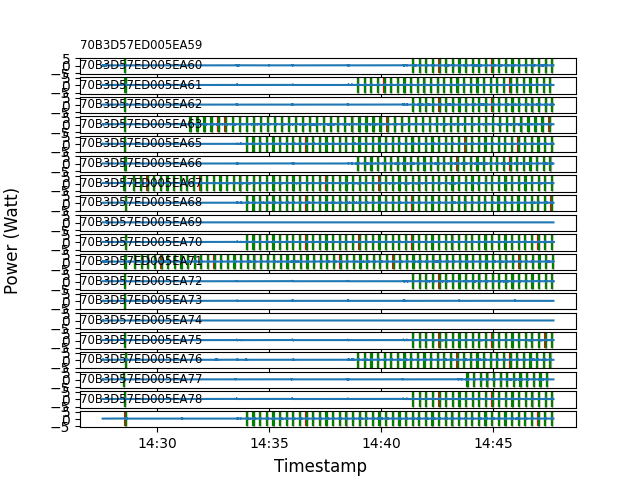

In [46]:
groups_by_node_id = power_consumption.groupby('node_id')
edges_by_node_id = edges.groupby('node_id')

fig, axs = plt.subplots(len(groups_by_node_id), 1, sharex=True, sharey=True, layout='constrained')

fig.supxlabel("Timestamp")
fig.supylabel("Power (Watt)")
for ((node_id, group), ax) in zip(groups_by_node_id, axs):
    if node_id in edges_by_node_id.groups:
        edges_grouped = edges_by_node_id.get_group(node_id)
        ax.vlines(edges_grouped['timestamp'], ymin=-5, ymax=5, color='red')
        ax.vlines(edges_grouped['next_timestamp'], ymin=-5, ymax=5, color='green')
        for row in edges_by_node_id.get_group(node_id).itertuples():
            ax.axvspan(row.sync_start, row.sync_end, color='grey', alpha=0.5)

    else:
        print(f"Node {node_id} has no edges")
    ax.plot(group.index, group["power"], label=node_id)
    ax.set_title(node_id, fontsize='small', loc='left')


plt.show()

In [47]:
# every loop starts with 2 sync signals right after each other
# find all sync signals where the next start is very close to previous end
grouped = edges.groupby('node_id')
edges['next_sync_start'] = grouped['sync_start'].shift(-1)
edges['next_sync_end'] = grouped['sync_end'].shift(-1)
loops = edges[abs(edges['sync_end'] - edges['next_sync_start']) < pd.Timedelta(milliseconds=500)][['node_id', 'sync_start', 'next_sync_end']].copy()
loops.rename(columns={'sync_start': 'loop_signal_start', 'next_sync_end': 'loop_signal_end'}, inplace=True)
loops['loop_num'] = loops.groupby('node_id').cumcount()
loops[['node_id','loop_num']]


,node_id,loop_num
timestamp,,
2024-04-25 14:28:31.262224,70B3D57ED005EA76,0
2024-04-25 14:28:32.815317,70B3D57ED005EA66,0
2024-04-25 14:28:33.602210,70B3D57ED005EA62,0
2024-04-25 14:28:33.987118,70B3D57ED005EA74,0
2024-04-25 14:28:34.044019,70B3D57ED005EA59,0
...,...,...
2024-04-25 14:47:37.212117,70B3D57ED005EA59,22
2024-04-25 14:47:37.214452,70B3D57ED005EA77,22
2024-04-25 14:47:37.233165,70B3D57ED005EA61,22


Node 70B3D57ED005EA68 has no loops
Node 70B3D57ED005EA73 has no loops


/home/flapkap/.local/lib/python3.10/site-packages/ipympl/backend_nbagg.py:336: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  self.figure.savefig(buf, format='png', dpi='figure')


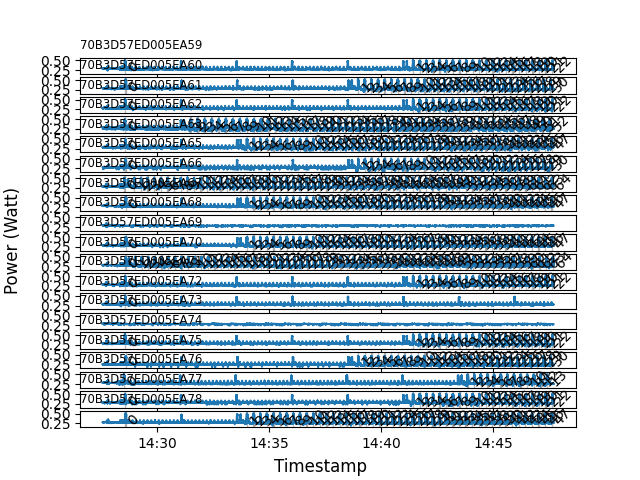

In [48]:

groups_by_node_id = power_consumption.groupby('node_id')
loops_by_node_id = loops.groupby('node_id')
fig, axs = plt.subplots(len(groups_by_node_id), 1, sharex=True, sharey=True, layout='constrained')

fig.supxlabel("Timestamp")
fig.supylabel("Power (Watt)")
for ((node_id, group), ax) in zip(groups_by_node_id, axs):
    if node_id in loops_by_node_id.groups:
        loops_group = loops_by_node_id.get_group(node_id)
        for row in loops_group.itertuples():
            ax.axvspan(row.loop_signal_start, row.loop_signal_end, color='tab:gray', alpha=0.5, label="loop signal")
            ax.text(row.loop_signal_end, 0.2, f"{row.loop_num}", rotation=45)
    else:
        print(f"Node {node_id} has no loops")
    ax.plot(group.index, group["power"], label=node_id)
    ax.set_title(node_id, fontsize='small', loc='left')

plt.show()

In [54]:
# 'TIMINGS> Loop: 0, Sync: 806 ms, Load: 40 ms, sensor init: 10 ms, env init: 0 ms, net init: 5216 ms, Collect: -1 ms, Exec: -1 ms, Send: 5119 ms, save config: 2646 ms, Sleep: 9 s\n'
query = """
SELECT 
    node_id,
    timestamp,
    regexp_extract(message, 'Loop: (-?[0-9]+)',1) as loop_num,
    regexp_extract(message, '.*Sync: (-?[0-9]+)',1) as sync_time_ms,
    regexp_extract(message, '.*Load: (-?[0-9]+)',1) as load_time_ms,
    regexp_extract(message, '.*sensor init: (-?[0-9]+)',1) as sensor_init_time_ms,
    regexp_extract(message, '.*env init: (-?[0-9]+)',1) as env_init_time_ms,
    regexp_extract(message, '.*net init: (-?[0-9]+)',1) as net_init_time_ms,
    --regexp_extract(message, '.*Listen: (-?[0-9]+)',1) as listen_time_ms,
    regexp_extract(message, '.*Collect: (-?[0-9]+)',1) as collect_time_ms,
    regexp_extract(message, '.*Exec: (-?[0-9]+)',1) as exec_time_ms,
    regexp_extract(message, '.*Send: (-?[0-9]+)',1) as send_time_ms,
    regexp_extract(message, '.*save config: (-?[0-9]+)',1) as save_config_time_ms,
    regexp_extract(message, '.*Sleep: (-?[0-9]+)',1) as sleep_time_s
FROM expdb.Trace
WHERE message LIKE 'TIMINGS>%'
"""
timings = %sql {{query}}
timings['node_id'].unique()

Running query in 'duckdb'

array(['70B3D57ED005EA66', '70B3D57ED005EA70', '70B3D57ED005EA62',
       '70B3D57ED005EA63', '70B3D57ED005EA69', '70B3D57ED005EA67',
       '70B3D57ED005EA78', '70B3D57ED005EA60', '70B3D57ED005EA75',
       '70B3D57ED005EA65', '70B3D57ED005EA74', '70B3D57ED005EA61',
       '70B3D57ED005EA59', '70B3D57ED005EA77', '70B3D57ED005EA71',
       '70B3D57ED005EA76'], dtype=object)

In [55]:
# since duckdb return all columns as object we need to change types before we can merge
timings[['loop_num', 'sync_time_ms', 'load_time_ms', 'sensor_init_time_ms', 'env_init_time_ms', 'net_init_time_ms', 'collect_time_ms', 'exec_time_ms', 'send_time_ms', 'save_config_time_ms', 'sleep_time_s']] = timings[['loop_num', 'sync_time_ms', 'load_time_ms', 'sensor_init_time_ms', 'env_init_time_ms', 'net_init_time_ms', 'collect_time_ms', 'exec_time_ms', 'send_time_ms', 'save_config_time_ms', 'sleep_time_s']].apply(pd.to_numeric)

# .. and merge. here we need to reset index first, since df.merge doesnt preserve index
loops = loops.reset_index().merge(timings, on=['node_id', 'loop_num']).set_index('loop_signal_start')
loops.head()

,timestamp_x,node_id,loop_signal_end,loop_num,start_time,sync_start,timestamp_y,sync_time_ms,load_time_ms,sensor_init_time_ms,env_init_time_ms,net_init_time_ms,collect_time_ms,exec_time_ms,send_time_ms,save_config_time_ms,sleep_time_s
loop_signal_start,,,,,,,,,,,,,,,,,
2024-04-25 14:28:31.162224,2024-04-25 14:28:31.262224,70B3D57ED005EA76,2024-04-25 14:28:31.964358,0,2024-04-25 14:28:31.262224,2024-04-25 14:28:31.262224,2024-04-25 14:43:44.064695,805,22,25,0,901916,-1,-1,7412,705,6
2024-04-25 14:28:32.715317,2024-04-25 14:28:32.815317,70B3D57ED005EA66,2024-04-25 14:28:33.519282,0,2024-04-25 14:28:32.815317,2024-04-25 14:28:32.815317,2024-04-25 14:28:52.787782,806,21,26,0,8428,-1,-1,8071,698,6
2024-04-25 14:28:33.502210,2024-04-25 14:28:33.602210,70B3D57ED005EA62,2024-04-25 14:28:34.305259,0,2024-04-25 14:28:33.602210,2024-04-25 14:28:33.602210,2024-04-25 14:31:22.829445,805,22,25,0,157122,-1,-1,7895,1436,6
2024-04-25 14:28:33.887118,2024-04-25 14:28:33.987118,70B3D57ED005EA74,2024-04-25 14:28:34.690075,0,2024-04-25 14:28:33.987118,2024-04-25 14:28:33.987118,2024-04-25 14:41:18.493049,805,22,26,0,752978,-1,-1,8073,692,6
2024-04-25 14:28:33.944019,2024-04-25 14:28:34.044019,70B3D57ED005EA59,2024-04-25 14:28:34.746427,0,2024-04-25 14:28:34.044019,2024-04-25 14:28:34.044019,2024-04-25 14:41:18.500038,806,21,26,0,752929,-1,-1,8074,697,6


In [56]:

loops["start_time"] = loops.index
loops["sync_start"] = loops["start_time"]
loops["sync_end"] = loops["sync_start"] + pd.to_timedelta(loops["sync_time_ms"], unit="ms")
loops["load_start"] = loops["sync_end"]
loops["load_end"] = loops["load_start"] + pd.to_timedelta(loops["load_time_ms"], unit="ms")
loops["sensor_init_start"] = loops["load_end"]
loops["sensor_init_end"] = loops["sensor_init_start"] + pd.to_timedelta(loops["sensor_init_time_ms"], unit="ms")
loops["env_init_start"] = loops["sensor_init_end"]
loops["env_init_end"] = loops["env_init_start"] + pd.to_timedelta(loops["env_init_time_ms"], unit="ms")
loops["net_init_start"] = loops["env_init_end"]
loops["net_init_end"] = loops["net_init_start"] + pd.to_timedelta(loops["net_init_time_ms"], unit="ms")
loops["collect_time_start"] = loops["net_init_end"]
loops["collect_time_end"] = loops["collect_time_start"] +pd.to_timedelta(loops["collect_time_ms"], unit="ms")
loops["exec_start"] = loops["collect_time_end"]
loops["exec_end"] = loops["exec_start"] + pd.to_timedelta(loops["exec_time_ms"], unit="ms")
loops["send_start"] = loops["exec_end"]
loops["send_end"] = loops["send_start"] +pd.to_timedelta(loops["send_time_ms"], unit="ms")
loops["save_config_start"] = loops["send_end"]
loops["save_config_end"] = loops["save_config_start"] + pd.to_timedelta(loops["save_config_time_ms"], unit="ms")
loops["sleep_start"] = loops["save_config_end"]
loops["sleep_end"] = loops["sleep_start"] + pd.to_timedelta(loops["sleep_time_s"], unit="s")

loops.replace(-1,0) # remove -1 values. They show up if the time measurement is not available



,timestamp_x,node_id,loop_signal_end,loop_num,start_time,sync_start,timestamp_y,sync_time_ms,load_time_ms,sensor_init_time_ms,...,collect_time_start,collect_time_end,exec_start,exec_end,send_start,send_end,save_config_start,save_config_end,sleep_start,sleep_end
loop_signal_start,,,,,,,,,,,,,,,,,,,,,
2024-04-25 14:28:31.162224,2024-04-25 14:28:31.262224,70B3D57ED005EA76,2024-04-25 14:28:31.964358,0,2024-04-25 14:28:31.162224,2024-04-25 14:28:31.162224,2024-04-25 14:43:44.064695,805,22,25,...,2024-04-25 14:43:33.930224,2024-04-25 14:43:33.929224,2024-04-25 14:43:33.929224,2024-04-25 14:43:33.928224,2024-04-25 14:43:33.928224,2024-04-25 14:43:41.340224,2024-04-25 14:43:41.340224,2024-04-25 14:43:42.045224,2024-04-25 14:43:42.045224,2024-04-25 14:43:48.045224
2024-04-25 14:28:32.715317,2024-04-25 14:28:32.815317,70B3D57ED005EA66,2024-04-25 14:28:33.519282,0,2024-04-25 14:28:32.715317,2024-04-25 14:28:32.715317,2024-04-25 14:28:52.787782,806,21,26,...,2024-04-25 14:28:41.996317,2024-04-25 14:28:41.995317,2024-04-25 14:28:41.995317,2024-04-25 14:28:41.994317,2024-04-25 14:28:41.994317,2024-04-25 14:28:50.065317,2024-04-25 14:28:50.065317,2024-04-25 14:28:50.763317,2024-04-25 14:28:50.763317,2024-04-25 14:28:56.763317
2024-04-25 14:28:33.502210,2024-04-25 14:28:33.602210,70B3D57ED005EA62,2024-04-25 14:28:34.305259,0,2024-04-25 14:28:33.502210,2024-04-25 14:28:33.502210,2024-04-25 14:31:22.829445,805,22,25,...,2024-04-25 14:31:11.476210,2024-04-25 14:31:11.475210,2024-04-25 14:31:11.475210,2024-04-25 14:31:11.474210,2024-04-25 14:31:11.474210,2024-04-25 14:31:19.369210,2024-04-25 14:31:19.369210,2024-04-25 14:31:20.805210,2024-04-25 14:31:20.805210,2024-04-25 14:31:26.805210
2024-04-25 14:28:33.887118,2024-04-25 14:28:33.987118,70B3D57ED005EA74,2024-04-25 14:28:34.690075,0,2024-04-25 14:28:33.887118,2024-04-25 14:28:33.887118,2024-04-25 14:41:18.493049,805,22,26,...,2024-04-25 14:41:07.718118,2024-04-25 14:41:07.717118,2024-04-25 14:41:07.717118,2024-04-25 14:41:07.716118,2024-04-25 14:41:07.716118,2024-04-25 14:41:15.789118,2024-04-25 14:41:15.789118,2024-04-25 14:41:16.481118,2024-04-25 14:41:16.481118,2024-04-25 14:41:22.481118
2024-04-25 14:28:33.944019,2024-04-25 14:28:34.044019,70B3D57ED005EA59,2024-04-25 14:28:34.746427,0,2024-04-25 14:28:33.944019,2024-04-25 14:28:33.944019,2024-04-25 14:41:18.500038,806,21,26,...,2024-04-25 14:41:07.726019,2024-04-25 14:41:07.725019,2024-04-25 14:41:07.725019,2024-04-25 14:41:07.724019,2024-04-25 14:41:07.724019,2024-04-25 14:41:15.798019,2024-04-25 14:41:15.798019,2024-04-25 14:41:16.495019,2024-04-25 14:41:16.495019,2024-04-25 14:41:22.495019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-25 14:47:23.128526,2024-04-25 14:47:23.228526,70B3D57ED005EA76,2024-04-25 14:47:23.931820,13,2024-04-25 14:47:23.128526,2024-04-25 14:47:23.128526,2024-04-25 14:47:30.674915,806,21,26,...,2024-04-25 14:47:24.037526,2024-04-25 14:47:24.036526,2024-04-25 14:47:24.036526,2024-04-25 14:47:24.035526,2024-04-25 14:47:24.035526,2024-04-25 14:47:28.116526,2024-04-25 14:47:28.116526,2024-04-25 14:47:28.654526,2024-04-25 14:47:28.654526,2024-04-25 14:47:38.654526
2024-04-25 14:47:29.862839,2024-04-25 14:47:29.962839,70B3D57ED005EA62,2024-04-25 14:47:30.665919,52,2024-04-25 14:47:29.862839,2024-04-25 14:47:29.862839,2024-04-25 14:47:38.508648,806,21,26,...,2024-04-25 14:47:30.771839,2024-04-25 14:47:30.771839,2024-04-25 14:47:30.771839,2024-04-25 14:47:30.891839,2024-04-25 14:47:30.891839,2024-04-25 14:47:34.923839,2024-04-25 14:47:34.923839,2024-04-25 14:47:36.193839,2024-04-25 14:47:36.193839,2024-04-25 14:47:46.193839
2024-04-25 14:47:31.950421,2024-04-25 14:47:32.050421,70B3D57ED005EA60,2024-04-25 14:47:32.753592,30,2024-04-25 14:47:31.950421,2024-04-25 14:47:31.950421,2024-04-25 14:47:39.493470,806,22,25,...,2024-04-25 14:47:32.860421,2024-04-25 14:47:32.859421,2024-04-25 14:47:32.859421,2024-04-25 14:47:32.858421,2024-04-25 14:47:32.858421,2024-04-25 14:47:36.937

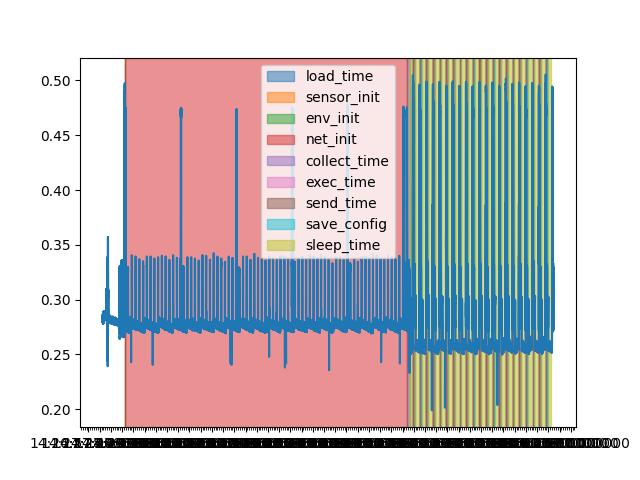

In [57]:
node_id = "70B3D57ED005EA59"
timing_data = loops[loops["node_id"] == node_id]
power_data = power_consumption[power_consumption["node_id"] == node_id]

plt.figure()
plt.plot(power_data.index, power_data["power"])
for row in timing_data.itertuples():
    plt.axvspan(row.load_start, row.load_end, color='tab:blue', alpha=0.5, label="load_time")
    plt.axvspan(row.sensor_init_start, row.sensor_init_end, color='tab:orange', alpha=0.5, label="sensor_init")
    plt.axvspan(row.env_init_start, row.env_init_end, color='tab:green', alpha=0.5, label="env_init")
    plt.axvspan(row.net_init_start, row.net_init_end, color='tab:red', alpha=0.5, label="net_init")
    plt.axvspan(row.collect_time_start, row.collect_time_end, color='tab:purple', alpha=0.5, label="collect_time")
    plt.axvspan(row.exec_start, row.exec_end, color='tab:pink', alpha=0.5, label="exec_time")
    plt.axvspan(row.send_start, row.send_end, color='tab:brown', alpha=0.5, label="send_time")
    plt.axvspan(row.save_config_start, row.save_config_end, color='tab:cyan', alpha=0.5, label="save_config")
    plt.axvspan(row.sleep_start, row.sleep_end, color='tab:olive', alpha=0.5, label="sleep_time")
# this to remove duplicate labels https://stackoverflow.com/questions/13588920/stop-matplotlib-repeating-labels-in-legend
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.gca().xaxis.set_major_locator(SecondLocator(interval=30))
plt.gca().xaxis.set_minor_locator(SecondLocator(interval=5))

plt.gca().xaxis.set_major_formatter(DateFormatter('%H:%M:%S.%f'))  # Set the date format for the tick labels
plt.show()


## Add events if any

In [58]:
# get all relevant frame-events
%sql send_frame_start << select * from expdb.Trace WHERE message LIKE '%send frame%'
%sql send_frame_end << select * from expdb.Trace WHERE message LIKE '%Transmission completed%'
%sql receive_frame_start << select * from expdb.Trace WHERE message LIKE '%RX started%'
%sql receive_frame_end << select * from expdb.Trace WHERE message LIKE '%received something%'

print(f"{len(send_frame_start)} send frame start events. {len(send_frame_end)} end events. {len(receive_frame_start)} receive frame start events. {len(receive_frame_end)} end events.")

Running query in 'duckdb'

Running query in 'duckdb'

Running query in 'duckdb'

Running query in 'duckdb'

0 send frame start events. 0 end events. 0 receive frame start events. 0 end events.


In [59]:
#drop first row of send_frame_end and receive_frame_start since thats from the join procedure
send_frame_end = send_frame_end.iloc[1:]
receive_frame_start = receive_frame_start.iloc[1:]

# confirm the 2 pairs of start/end all have the same length
assert len(send_frame_start) == len(send_frame_end), f"send frame event mismatch. start {len(send_frame_start)}, end { len(send_frame_end)}"
assert len(receive_frame_start) == len(receive_frame_end), f"receive frame event mismatch  {len(receive_frame_start)}, end { len(receive_frame_end)}"

In [60]:
# add send and receive columns to plot
#TODO: update this to support more nodes
# for send_start_row, send_end_row in zip(send_frame_start.itertuples(), send_frame_end.itertuples()):
#     start_time = send_start_row.timestamp
#     end_time = send_end_row.timestamp
#     plt.axvspan(start_time, end_time, color='tab:pink', alpha=0.5, label="send_events")

# for receive_frame_start, receive_frame_end in zip(receive_frame_start.itertuples(), receive_frame_end.itertuples()):
#     start_time = receive_frame_start.timestamp
#     end_time = receive_frame_end.timestamp
#     plt.axvspan(start_time, end_time, color='tab:brown', alpha=0.5, label="receive_events")


# handles, labels = plt.gca().get_legend_handles_labels()
# by_label = dict(zip(labels, handles))
# plt.legend(by_label.values(), by_label.keys())

# plt.show()

In [61]:
%sql SELECT * from expdb.Content_Message

Running query in 'duckdb'

,content_message_id,frame_counter,frame_port,frame_payload
0,1,0,2,PDM=
1,2,0,2,PDM=
2,3,-1,1,CmwKagpoCmQKAggBCgIQAAoCCAAKAhAICgIICgoCCAEKAh...
3,4,-1,1,CmwKagpoCmQKAggBCgIQAAoCCAAKAhAICgIICgoCCAEKAh...
4,5,-1,1,CmwKagpoCmQKAggBCgIQAAoCCAAKAhAICgIICgoCCAEKAh...
...,...,...,...,...
237,252,63,2,PDM=
238,253,13,2,PDM=
239,254,52,2,Cg4SAyC6ExIDIPAaEgJABg==
240,255,64,2,PDM=


In [62]:
%%sql
SELECT
    through_gateway,
    gateway_received_at,
    app_received_at,
    rssi,
    snr,
    bandwidth,
    frequency,
    consumed_airtime_s,
    spreading_factor,
    coding_rate,
    frame_counter,
    frame_port,
    frame_payload,
    from_base64(frame_payload) as decoded_payload,
    related_node,
    network_received_at
FROM
    expdb.Uplink_Message,
    expdb.Content_Message,
    expdb.Message 
WHERE
    Uplink_Message.uplink_message_id = Message.message_id AND
    Content_Message.content_message_id = Message.message_id

Running query in 'duckdb'

,through_gateway,gateway_received_at,app_received_at,rssi,snr,bandwidth,frequency,consumed_airtime_s,spreading_factor,coding_rate,frame_counter,frame_port,frame_payload,decoded_payload,related_node,network_received_at
0,iot-lab-saclay-gateway,2024-04-25 12:28:43,2024-04-25 12:28:43.554838,-34,7.00,125000,867500000,1.155072,SF12,4/5,0,2,PDM=,"[60, 51]",70B3D57ED005EA66,2024-04-25 12:28:43.350781
1,gw-tetech-test,2024-04-25 12:28:45,2024-04-25 12:28:46.083653,-124,-12.20,125000,867100000,1.155072,SF12,4/5,0,2,PDM=,"[60, 51]",70B3D57ED005EA70,2024-04-25 12:28:45.874142
2,gw-tetech-test,2024-04-25 12:29:01,2024-04-25 12:29:01.359500,-120,-0.20,125000,868100000,1.155072,SF12,4/5,1,2,PDM=,"[60, 51]",70B3D57ED005EA66,2024-04-25 12:29:01.154741
3,gw-tetech-test,2024-04-25 12:29:03,2024-04-25 12:29:03.318425,-124,-5.80,125000,868100000,1.155072,SF12,4/5,1,2,PDM=,"[60, 51]",70B3D57ED005EA70,2024-04-25 12:29:03.111114
4,gw-tetech-test,2024-04-25 12:29:18,2024-04-25 12:29:19.098943,-121,-1.80,125000,868300000,1.155072,SF12,4/5,2,2,PDM=,"[60, 51]",70B3D57ED005EA66,2024-04-25 12:29:18.891026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,gw-tetech-test,2024-04-25 12:44:10,2024-04-25 12:44:10.374873,-123,-0.50,125000,868100000,1.155072,SF12,4/5,2,2,PDM=,"[60, 51]",70B3D57ED005EA76,2024-04-25 12:44:10.171487
183,gw-tetech-test,2024-04-25 12:45:38,2024-04-25 12:45:39.076585,-122,-2.00,125000,868100000,1.155072,SF12,4/5,7,2,PDM=,"[60, 51]",70B3D57ED005EA76,2024-04-25 12:45:38.866955
184,iot-lab-saclay-gateway,2024-04-25 12:46:17,2024-04-25 12:46:18.009204,-107,-2.75,125000,867100000,1.646592,SF12,4/5,48,2,Cg4SAyC6ExIDIPAaEgJABg==,"[10, 14, 18, 3, 32, 186, 19, 18, 3, 32, 240, 2...",70B3D57ED005EA62,2024-04-25 12:46:17.804622
185,gw-tetech-test,2024-04-25 12:46:23,2024-04-25 12:46:23.554533,-123,-4.20,125000,868300000,1.155072,SF12,4/5,26,2,PDM=,"[60, 51]",70B3D57ED005EA65,2024-04-25 12:46:23.344047


## experiment stats
with sync signals and events mapped we can see some stats on the experiments

In [63]:
%%sql
select * from expdb.Node

Running query in 'duckdb'

,node_deveui,node_appeui,node_appkey,board_id,radio_chipset,node_site,profile,riot_board,failed
0,70B3D57ED005EA59,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1,0
1,70B3D57ED005EA60,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1,0
2,70B3D57ED005EA61,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1,0
3,70B3D57ED005EA62,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1,0
4,70B3D57ED005EA63,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1,0
5,70B3D57ED005EA64,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1,1
6,70B3D57ED005EA65,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1,0
7,70B3D57ED005EA66,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1,0
8,70B3D57ED005EA67,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1,0
9,70B3D57ED005EA68,0000000000000000,385794DDE70CE2EAB5B5B12A4807822C,st-lrwan1,sx1276,saclay,stm32Profile,b-l072z-lrwan1,1


In [64]:
loops.groupby('node_id')['loop_num'].max()

node_id
70B3D57ED005EA59    21
70B3D57ED005EA60    30
70B3D57ED005EA61    21
70B3D57ED005EA62    52
70B3D57ED005EA63    46
70B3D57ED005EA65    30
70B3D57ED005EA66    63
70B3D57ED005EA67    46
70B3D57ED005EA69    46
70B3D57ED005EA70    63
70B3D57ED005EA71    21
70B3D57ED005EA74    21
70B3D57ED005EA75    30
70B3D57ED005EA76    13
70B3D57ED005EA77    21
70B3D57ED005EA78    46
Name: loop_num, dtype: int64

## Calculate Total Energy Consumed per region

In [65]:
np.sum((np.abs(np.diff(power_consumption.index.to_numpy())) / np.timedelta64(1, 's')) * power_consumption["power"].values[:-1])

12401.763181066415

In [67]:
#define function to calculate energy consumed

def calc_energy_consumed(df: pd.DataFrame):

    # create a copy of the dataframe with only index and power
    if len(df) == 0:
        return 0
        # ensure we only calculate for data frames containing data from a single node
    assert len(df["node_id"].unique()) == 1, "energy consumption only supported for single node"

    # assert df have columns "power" and index of "timestamp" type
    assert "power" in df.columns, "power column not found"
    assert isinstance(df.index, pd.DatetimeIndex), "index is not  of type pd.DatetimeIndex"
    times = df.index.array
    powers = df["power"].values

    #power["power_diff"] = power.diff().shift(-1) #  current - previous, shifted one back so it becomes next - current. i.e. current + diff = next
    time_diff= np.abs(np.diff(times)) # abs(next-current)
    time_diff_s = time_diff / np.timedelta64(1, 's') # get timediff in fractions of a second
    powers = powers[:-1] # drop last row since it has no next and doesnt match up with the time_diff
    return np.sum(powers * time_diff_s) # returns the sum of power times fractions of a second. Since power is in W and time_diff_s is in seconds it is in W*s or J


In [68]:
# loops contain the start and end times of each activity, so loop over loops and calculate the energy for each activity
def calc_energy_consumed_per_activity(series_loops: pd.Series) -> pd.Series:
    power_consumption_for_node = power_consumption[(power_consumption["node_id"] == series_loops["node_id"])]
    return pd.Series({
        "node_id": series_loops["node_id"],
        "loop_num": series_loops["loop_num"],
        "total": calc_energy_consumed(power_consumption_for_node.loc[series_loops.name:series_loops["sleep_end"]]),
        "loop signal": calc_energy_consumed(power_consumption_for_node.loc[series_loops.name:series_loops["loop_signal_end"]]),
        "total without loop signal": calc_energy_consumed(power_consumption_for_node.loc[series_loops["loop_signal_end"]:series_loops["sleep_end"]]),
        "load config": calc_energy_consumed(power_consumption_for_node.loc[series_loops["load_start"]:series_loops["load_end"]]),
        "sensor init": calc_energy_consumed(power_consumption_for_node.loc[series_loops["sensor_init_start"]:series_loops["sensor_init_end"]]),
        "env init": calc_energy_consumed(power_consumption_for_node.loc[series_loops["env_init_start"]:series_loops["env_init_end"]]),
        "net init": calc_energy_consumed(power_consumption_for_node.loc[series_loops["net_init_start"]:series_loops["net_init_end"]]),
        "sensor collect": calc_energy_consumed(power_consumption_for_node.loc[series_loops["collect_time_start"]:series_loops["collect_time_end"]]),
        "query execution": calc_energy_consumed(power_consumption_for_node.loc[series_loops["exec_start"]:series_loops["exec_end"]]),
        "send": calc_energy_consumed(power_consumption_for_node.loc[series_loops["send_start"]:series_loops["send_end"]]),
        "save config": calc_energy_consumed(power_consumption_for_node.loc[series_loops["save_config_start"]:series_loops["save_config_end"]]),
        "sleep": calc_energy_consumed(power_consumption_for_node.loc[series_loops["sleep_start"]:series_loops["sleep_end"]]),
    })
energy_consumed = loops.apply(calc_energy_consumed_per_activity, axis=1)
energy_consumed_summary = energy_consumed.describe()
energy_consumed_summary

,loop_num,total,loop signal,total without loop signal,load config,sensor init,env init,net init,sensor collect,query execution,send,save config,sleep
count,586.000000,586.000000,586.000000,586.000000,586.000000,586.000000,586.0,586.000000,586.0,586.000000,586.000000,586.000000,586.000000
mean,21.117747,8.200315,0.309137,7.890859,0.005798,0.007126,0.0,3.729923,0.0,0.003059,1.418683,0.165635,2.558628
std,15.323792,25.647251,0.006959,25.647254,0.000243,0.000303,0.0,25.635553,0.0,0.009810,0.178496,0.059342,0.227248
min,0.000000,2.478550,0.283445,2.193269,0.005202,0.006313,0.0,0.014436,0.0,0.000000,1.192921,0.130588,0.768443
25%,9.000000,4.452881,0.307495,4.145823,0.005589,0.006942,0.0,0.015908,0.0,0.000000,1.378668,0.145493,2.586090
50%,18.000000,4.489545,0.310476,4.178391,0.005749,0.007127,0.0,0.016090,0.0,0.000000,1.389560,0.146648,2.606650
75%,31.000000,4.554662,0.312716,4.237274,0.005965,0.007321,0.0,0.016278,0.0,0.000000,1.409126,0.148532,2.640211
max,63.000000,255.379091,0.321094,255.071229,0.006408,0.007762,0.0,250.946162,0.0,0.035031,2.544803,0.393613,2.691293


In [69]:
import scipy.stats as st
def calc_confidence_interval(series: pd.Series) -> pd.Series:
    assert "mean" in series.index, "mean not in index"
    assert "std" in series.index, "std not in index"
    low, high = st.norm.interval(0.95, loc=series["mean"], scale=series["std"])
    return pd.Series({
        "low": low,
        "high": high
    })



In [70]:
errors = energy_consumed_summary.apply(calc_confidence_interval)
errors = np.abs(errors)
errors

/home/flapkap/.local/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2246: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/flapkap/.local/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2247: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


,loop_num,total,loop signal,total without loop signal,load config,sensor init,env init,net init,sensor collect,query execution,send,save config,sleep
low,8.916332,42.067372,0.295498,42.376836,0.005321,0.006531,NaN,46.514837,NaN,0.016169,1.068837,0.049326,2.113229
high,51.151827,58.468003,0.322776,58.158554,0.006274,0.007721,NaN,53.974682,NaN,0.022286,1.768528,0.281944,3.004027


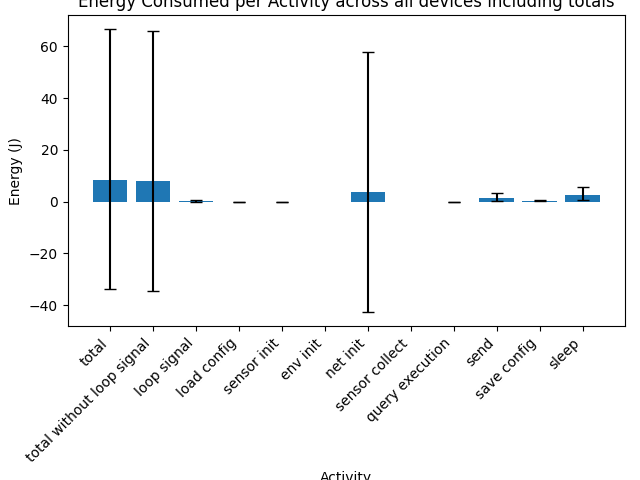

In [71]:
# plot barchart with stddev error bars
plt.figure()
to_plot = energy_consumed_summary[["total", "total without loop signal", "loop signal", "load config", "sensor init", "env init", "net init", "sensor collect", "query execution", "send", "save config", "sleep"]]
errors = errors[["total", "total without loop signal", "loop signal", "load config", "sensor init", "env init", "net init", "sensor collect", "query execution", "send", "save config", "sleep"]]
plt.bar(to_plot.columns, to_plot.loc["mean"], yerr=errors,capsize=4)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.xlabel("Activity")
plt.ylabel("Energy (J)")
plt.title("Energy Consumed per Activity across all devices including totals")
plt.show()

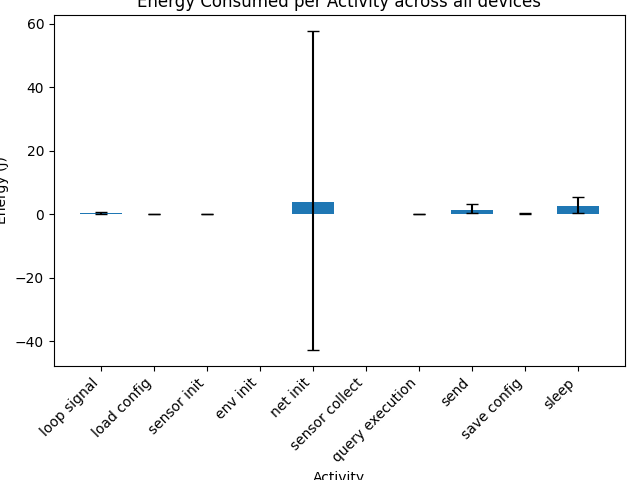

In [72]:
# plot barchart without totals 
plt.figure()
to_plot = energy_consumed_summary[["loop signal", "load config", "sensor init", "env init", "net init", "sensor collect", "query execution", "send", "save config", "sleep"]]
errors = errors[["loop signal", "load config", "sensor init", "env init", "net init", "sensor collect", "query execution", "send", "save config", "sleep"]]
plt.bar(to_plot.columns, to_plot.loc["mean"], yerr=errors, capsize=4)
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.xlabel("Activity")
plt.ylabel("Energy (J)")
plt.title("Energy Consumed per Activity across all devices")
plt.show()

In [73]:
# plot barchart without totals and without the 0th loop
# recalc summary without 0 loops
without_0th_loop = loops[loops["loop_num"] > 0].apply(calc_energy_consumed_per_activity, axis=1)
without_0th_loop_summary = without_0th_loop.describe()

In [74]:
errors_with_0th_loop = without_0th_loop_summary.apply(calc_confidence_interval)
errors_with_0th_loop = np.abs(errors_with_0th_loop)
errors_with_0th_loop

/home/flapkap/.local/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2246: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/home/flapkap/.local/lib/python3.10/site-packages/scipy/stats/_distn_infrastructure.py:2247: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


,loop_num,total,loop signal,total without loop signal,load config,sensor init,env init,net init,sensor collect,query execution,send,save config,sleep
low,7.918620,4.071627,0.295546,3.769680,0.005323,0.006529,NaN,0.015108,NaN,0.016325,1.308605,0.048446,2.275161
high,51.339673,4.896340,0.322738,4.579363,0.006274,0.007721,NaN,0.016891,NaN,0.022613,1.470753,0.280711,2.897200


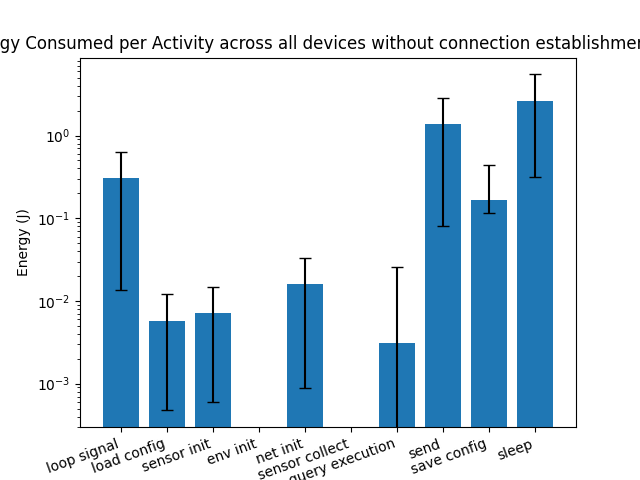

In [75]:
to_plot = without_0th_loop_summary[["loop signal", "load config", "sensor init", "env init", "net init", "sensor collect", "query execution", "send", "save config", "sleep"]]
errors = errors_with_0th_loop[["loop signal", "load config", "sensor init", "env init", "net init", "sensor collect", "query execution", "send", "save config", "sleep"]]
#energy_consumed_without_0th_loop
plt.figure()
plt.bar(to_plot.columns, to_plot.loc["mean"], yerr=errors, capsize=4, log=True)
plt.xticks(rotation=20, ha="right")

plt.xlabel("Activity")
plt.ylabel("Energy (J)")
plt.title("Energy Consumed per Activity across all devices without connection establishment loop")
plt.show()

In [76]:
without_0th_loop.groupby("node_id").describe()

loop_num                                                  \
                    count  mean        std  min    25%   50%    75%   max   
node_id                                                                     
70B3D57ED005EA59     21.0  11.0   6.204837  1.0   6.00  11.0  16.00  21.0   
70B3D57ED005EA60     30.0  15.5   8.803408  1.0   8.25  15.5  22.75  30.0   
70B3D57ED005EA61     21.0  11.0   6.204837  1.0   6.00  11.0  16.00  21.0   
70B3D57ED005EA62     52.0  26.5  15.154757  1.0  13.75  26.5  39.25  52.0   
70B3D57ED005EA63     46.0  23.5  13.422618  1.0  12.25  23.5  34.75  46.0   
70B3D57ED005EA65     30.0  15.5   8.803408  1.0   8.25  15.5  22.75  30.0   
70B3D57ED005EA66     63.0  32.0  18.330303  1.0  16.50  32.0  47.50  63.0   
70B3D57ED005EA67     46.0  23.5  13.422618  1.0  12.25  23.5  34.75  46.0   
70B3D57ED005EA69     46.0  23.5  13.422618  1.0  12.25  23.5  34.75  46.0   
70B3D57ED005EA70     63.0  32.0  18.330303  1.0  16.50  32.0  47.50  63.0   
70B3D57ED005EA71     21.0  11.0   6.204837  1.0   6.00  11.0  16.00  21.0   
70B3D57ED005EA74     21.0  11.0   6.204837  1.0   6.00  11.0  16.00  21.0   
70B3D57ED005EA75     30.0  15.5   8.803408  1.0   8.25  15.5  22.75  30.0   
70B3D57ED005EA76     13.0   7.0   3.894440  1.0   4.00   7.0  10.00  13.0   
70B3D57ED005EA77     21.0  11.0   6.204837  1.0   6.00  11.0  16.00  21.0   
70B3D57ED005EA78     46.0  23.5  13.422618  1.0  12.25  23.5  34.75  46.0   

                 total            ... save config           sleep            \
                 count      mean  ...         75%       max count      mean   
node_id                           ...                                         
70B3D57ED005EA59  21.0  4.504673  ...    0.147730  0.148047  21.0  2.621827   
70B3D57ED005EA60  30.0  4.506485  ...    0.150233  0.151129  30.0  2.594343   
70B3D57ED005EA61  21.0  4.483786  ...    0.145825  0.147050  21.0  2.601369   
70B3D57ED005EA62  52.0  4.800565  ...    0.353144  0.355766  52.0  2.605973   
70B3D57ED005EA63  46.0  4.521301  ...    0.147835  0.148521  46.0  2.630507   
70B3D57ED005EA65  30.0  4.255955  ...    0.141681  0.142276  30.0  2.444289   
70B3D57ED005EA66  63.0  4.509779  ...    0.148122  0.149072  63.0  2.631442   
70B3D57ED005EA67  46.0  4.578519  ...    0.151800  0.152746  46.0  2.670836   
70B3D57ED005EA69  46.0  4.464643  ...    0.145607  0.146080  46.0  2.589915   
70B3D57ED005EA70  63.0  4.448479  ...    0.146289  0.147820  63.0  2.593839   
70B3D57ED005EA71  21.0  4.462935  ...    0.146894  0.147910  21.0  2.588908   
70B3D57ED005EA74  21.0  4.568211  ...    0.148430  0.148972  21.0  2.659689   
70B3D57ED005EA75  30.0  3.995311  ...    0.132381  0.133553  30.0  2.278884   
70B3D57ED005EA76  13.0  4.485451  ...    0.148687  0.149082  13.0  2.611914   
70B3D57ED005EA77  21.0  4.447547  ...    0.145148  0.145218  21.0  2.580350   
70B3D57ED005EA78  46.0  4.457651  ...    0.147331  0.147868  46.0  2.583611   

                                                                              
                       std       min       25%       50%       75%       max  
node_id                                                                       
70B3D57ED005EA59  0.006475  2.606670  2.619319  2.622853  2.626193  2.630313  
70B3D57ED005EA60  0.321091  0.896598  2.640592  2.650626  2.668477  2.691293  
70B3D57ED005EA61  0.009626  2.585239  2.594493  2.599910  2.607116  2.617275  
70B3D57ED005EA62  0.197956  1.211013  2.620512  2.632483  2.647679  2.663299  
70B3D57ED005EA63  0.013303  2.611615  2.616616  2.634501  2.641225  2.655326  
70B3D57ED005EA65  0.308634  0.811646  2.486745  2.500395  2.511317  2.523100  
70B3D57ED005EA66  0.013598  2.607414  2.619928  2.633235  2.642394  2.656047  
70B3D57ED005EA67  0.008396  2.657128  2.666110  2.669914  2.677139  2.685585  
70B3D57ED005EA69  0.002232  2.585857  2.588482  2.589892  2.591167  2.596183  
70B3D57ED005EA70  0.007124  2.582063  2.589209  2.593813  2.600878  2.606262  
70B3D57ED005EA71  0.0061

In [77]:
## plot per node
grouped = without_0th_loop[["node_id","loop signal", "load config", "sensor init", "env init", "net init", "sensor collect", "query execution", "send", "save config", "sleep"]] \
    .groupby("node_id")
grouped_agg = grouped.agg(["mean", "std"])
for (name, group) in grouped_agg:
    print(f"{name}: {group}")

means.T.plot(kind="bar",
          title="Energy Consumed per Activity per device without connection establishment loop",
          ylabel="Energy (J)",
          xlabel="Activity",
         # yerr=errors.T,
          capsize=2,
          logy=True,
          rot=45,
          log=True)
# plt.figure()
# for name, group in grouped:
#     print(name)
#     gg = group.describe()
#     plt.bar(gg.columns, gg.loc["mean"], yerr=gg.loc["std"], capsize=4, log=True)
# plt.xticks(rotation=20, ha="right")

# plt.xlabel("Activity")
# plt.ylabel("Energy (J)")
# plt.title("Energy Consumed per Activity across all devices without connection establishment loop")
# plt.show()

loop signal: mean
loop signal: std
load config: mean
load config: std
sensor init: mean
sensor init: std
env init: mean
env init: std
net init: mean
net init: std
sensor collect: mean
sensor collect: std
query execution: mean
query execution: std
send: mean
send: std
save config: mean
save config: std
sleep: mean
sleep: std


NameError: name 'means' is not defined